# Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset


In [ ]:
dataset=pd.read_csv('study hours.csv')
print(dataset)
print("")
dataset = dataset.replace('None', np.nan)
dataset = dataset.dropna()
print(dataset)
print("")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print("")
print(y)

    Study Hours per week Result
0                    NaN    NaN
1                   12.0      p
2                    1.0      f
3                    5.0      f
4                    7.0      p
5                    2.0      f
6                    8.0      p
7                    9.0      p
8                   10.0      p
9                    6.0      p
10                  15.0      p
11                  11.0      p
12                   0.0      f
13                   7.0      p
14                  12.0      p
15                   1.0      f
16                   8.0      p
17                   3.0      f
18                  18.0      p
19                  16.0      p
20                  10.0      p
21                   9.0      p
22                   8.0      p
23                   1.0      f
24                   2.0      f
25                   3.0      f
26                   4.0      f
27                   4.0      f
28                   9.0      p
29                   5.0      f
30      

# Encoding the dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Result'] = le.fit_transform(dataset['Result'])
print(dataset)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values
print(x)
print("")
print(y)

    Study Hours per week  Result
1                   12.0       1
2                    1.0       0
3                    5.0       0
4                    7.0       1
5                    2.0       0
6                    8.0       1
7                    9.0       1
8                   10.0       1
9                    6.0       1
10                  15.0       1
11                  11.0       1
12                   0.0       0
13                   7.0       1
14                  12.0       1
15                   1.0       0
16                   8.0       1
17                   3.0       0
18                  18.0       1
19                  16.0       1
20                  10.0       1
21                   9.0       1
22                   8.0       1
23                   1.0       0
24                   2.0       0
25                   3.0       0
26                   4.0       0
27                   4.0       0
28                   9.0       1
29                   5.0       0
30        

# Splitting the dataset into train & test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0 )
print(x_train)
print("")
print(x_test)
print("")
print(y_train)
print("")
print(y_test)

[[ 4.]
 [ 5.]
 [10.]
 [10.]
 [11.]
 [ 3.]
 [ 7.]
 [16.]
 [ 8.]
 [ 6.]
 [12.]
 [ 8.]
 [18.]
 [ 1.]
 [10.]
 [ 5.]
 [ 1.]
 [ 7.]
 [ 9.]
 [ 3.]
 [ 9.]
 [ 2.]
 [ 2.]
 [16.]
 [ 8.]
 [10.]
 [15.]
 [ 0.]
 [ 7.]
 [12.]]

[[ 1.]
 [15.]
 [ 3.]
 [ 8.]
 [ 0.]
 [ 9.]
 [ 4.]
 [11.]]

[0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1]

[0 1 0 1 0 1 0 1]


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

print(x_train)
print("")
print("")
print(x_test)

[[-0.81716624]
 [-0.60399244]
 [ 0.46187657]
 [ 0.46187657]
 [ 0.67505037]
 [-1.03034004]
 [-0.17764484]
 [ 1.74091938]
 [ 0.03552897]
 [-0.39081864]
 [ 0.88822418]
 [ 0.03552897]
 [ 2.16726699]
 [-1.45668765]
 [ 0.46187657]
 [-0.60399244]
 [-1.45668765]
 [-0.17764484]
 [ 0.24870277]
 [-1.03034004]
 [ 0.24870277]
 [-1.24351385]
 [-1.24351385]
 [ 1.74091938]
 [ 0.03552897]
 [ 0.46187657]
 [ 1.52774558]
 [-1.66986145]
 [-0.17764484]
 [ 0.88822418]]


[[-1.45668765]
 [ 1.52774558]
 [-1.03034004]
 [ 0.03552897]
 [-1.66986145]
 [ 0.24870277]
 [-0.81716624]
 [ 0.67505037]]


# Training the Logistic Regression model Using Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

# Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[19.4]])))

[1]


# Predicting the Test set results

In [ ]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 0]
 [0 4]]


1.0

# Visualising the Training set results

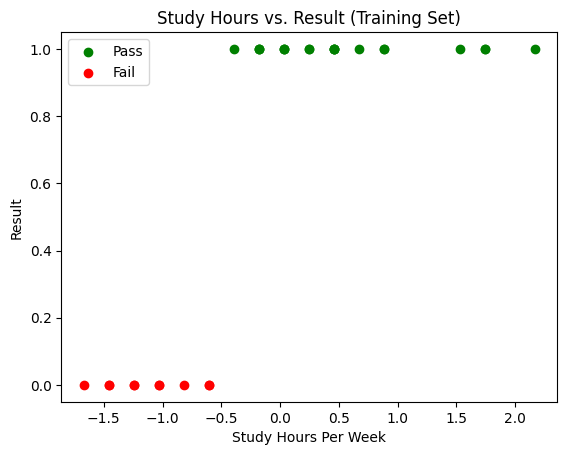

In [ ]:

x_train_pass = x_train[y_train == 1]
y_train_pass = y_train[y_train == 1]
x_train_fail = x_train[y_train == 0]
y_train_fail = y_train[y_train == 0]


plt.scatter(x_train_pass, y_train_pass, color='green', label='Pass')
plt.scatter(x_train_fail, y_train_fail, color='red', label='Fail')

plt.title('Study Hours vs. Result (Training Set)')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Result')
plt.legend()
plt.show()

# Visualising the Testing set results

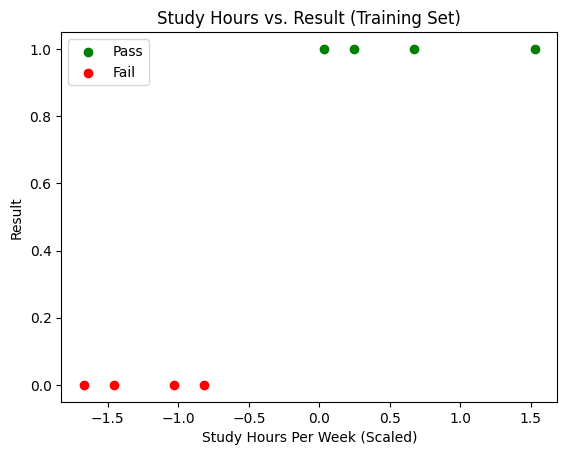

In [ ]:
import matplotlib.pyplot as plt

# Assuming x_train, y_train are already defined

# Filter data points for Pass and Fail
x_test_pass = x_test[y_test == 1]
y_test_pass = y_test[y_test == 1]
x_test_fail = x_test[y_test == 0]
y_test_fail = y_test[y_test == 0]

# Create the scatter plot
plt.scatter(x_test_pass, y_test_pass, color='green', label='Pass')
plt.scatter(x_test_fail, y_test_fail, color='red', label='Fail')

plt.title('Study Hours vs. Result (Training Set)')
plt.xlabel('Study Hours Per Week (Scaled)')
plt.ylabel('Result')
plt.legend()
plt.show()

# Visualising with new datapoint & predicting result

Enter the study hours for the new datapoint: 1


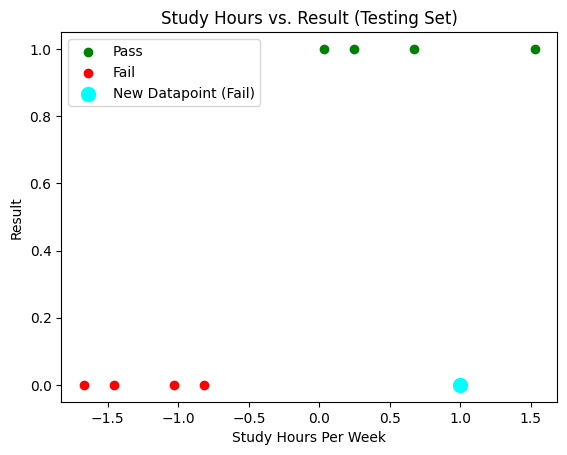

Predicted result for the new datapoint:  0


In [ ]:
new_study_hours = float(input("Enter the study hours for the new datapoint: "))
new_datapoint_result = classifier.predict(sc.transform([[new_study_hours]]))
x_test_pass = x_test[y_test == 1]
y_test_pass = y_test[y_test == 1]
x_test_fail = x_test[y_test  == 0]
y_test_fail = y_test[y_test == 0]

# Create the scatter plot
plt.scatter(x_test_pass, y_test_pass, color='green', label='Pass')
plt.scatter(x_test_fail, y_test_fail, color='red', label='Fail')

if new_datapoint_result[0] == 1:
    plt.scatter(new_study_hours, new_datapoint_result, color='yellow', marker='o', s=100, label='New Datapoint (Pass)')
else:
    plt.scatter(new_study_hours, new_datapoint_result, color='aqua', marker='o', s=100, label='New Datapoint (Fail)')


plt.title('Study Hours vs. Result (Testing Set)')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Result')
plt.legend()
plt.show()

print("Predicted result for the new datapoint: ", new_datapoint_result[0])